# "Predictive Maintenance in Semiconductor Industry" For SECOM Dataset

# Procedure using CRISP Model

# Data Understanding Phase


In [35]:
## Import necessary modules to import data and read the data
import pandas as pd

#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split

### Import and read the data

In [36]:
# Import and read the data
df = pd.read_spss("C://DataScience//SECOM//secom_mod.SAV")
df.head(5)

,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### Observations

In [37]:
df.info()
print("\nDIMENSION of the table is: \n", df.shape)       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 593 entries, ID to feature590
dtypes: float64(592), object(1)
memory usage: 7.1+ MB

DIMENSION of the table is: 
 (1567, 593)


# Split the Dataset into Test and Train

In [38]:
#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis= 1)
y = df['class']

# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2)
# X_train = X_train.copy()

# Data cleaning 

In [39]:
X = X.drop('timestamp',axis = 1)

In [40]:
# Goal: Classification to predict the semiconductor would be a non-defective or defective 
# Hence making the target variable as categorical
# y_train = y_train.astype('category')
# assert y_train.dtype == 'category'

### dropping the timestamp column as it is not used for modelling

In [41]:
#dropping the timestamp column as it is not used for modelling
#X_train = X_train.drop('timestamp',axis = 1)
X.shape

(1567, 591)

### Remove columns with more than 55%

In [42]:
# Data is in form of just numbers hence taking statistical approach for data cleaning
# Remove columns with more than 55%
#applying lambda function to select the columns more than 55% null values

X_new1 = X.drop(X.columns[X.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)
X_new1.shape

(1567, 567)

### Removing the columes if having any unique values

In [43]:
# Removing the columes if having any unique values
X_new2 = X_new1.drop(X_new1.columns[X_new1.apply(lambda col: col.nunique()) == 1],axis=1)
X_new2.shape

(1567, 451)

In [44]:
# Checking missing values
X_new2.isnull().sum().sum()

14044

### Outlier detection and Removal using 3s rule

In [12]:
# Outlier detection and Removal using 3s rule
import numpy as np
X_new3 = X_new2[np.abs(X_new2-X_new2.mean())<=(3*X_new2.std())]
X_new3.shape
# = X_new3.drop(["ID"], axis= 1)
X_new3

,ID,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,...,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1.0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2.0,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3.0,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,NaN,NaN,82.8602
3,4.0,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5.0,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,NaN,NaN,NaN,NaN,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1563.0,2899.41,2464.36,2179.7333,NaN,1.4843,NaN,0.1248,1.3424,-0.0045,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,1564.0,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,1565.0,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,1566.0,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2)
X_train = X_train.copy()

In [14]:
print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (y_train.shape)
X_train.head()

(1253, 591)
(314, 591)
(314,)
(1253,)


,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
1006,1007.0,3072.86,2434.60,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.5587,...,NaN,NaN,0.5025,0.0125,0.0041,2.4971,0.0552,0.0178,0.0051,32.2058
1203,1204.0,3002.15,2486.94,2218.7778,2080.6085,2.1254,100.0,91.0211,0.1229,1.4093,...,0.0033,47.0754,0.5008,0.0112,0.0024,2.2391,0.0193,0.0091,0.0033,47.0754
1126,1127.0,3038.74,2432.83,2222.0111,1229.4964,0.7647,100.0,105.2711,0.1183,1.4796,...,0.0035,45.3908,0.5023,0.0138,0.0033,2.7407,0.0258,0.0117,0.0035,45.3908
959,960.0,3024.67,2620.96,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.5648,...,NaN,NaN,0.5050,0.0221,0.0047,4.3760,0.0260,0.0268,0.0068,103.3520
1455,1456.0,3022.41,2507.66,2239.4111,1080.4985,1.2079,100.0,115.6522,0.1203,1.5124,...,0.0033,45.0140,0.4922,0.0143,0.0040,2.9081,0.0251,0.0113,0.0033,45.0140


In [15]:
X1 = X_train.drop(["ID"], axis= 1)

# IMPUTE USING KNN

In [16]:
#imputing the values using KNN

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [17]:
X_train_filled = imputer.fit_transform(X_train)
X_train_filled
X_train_filled.shape


(1253, 591)

In [18]:
#imputing the values in the dataset 

X_train3_imputed = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train3_imputed.head(3)

,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1007.0,3072.86,2434.60,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.5587,...,0.0086,87.50148,0.5025,0.0125,0.0041,2.4971,0.0552,0.0178,0.0051,32.2058
1,1204.0,3002.15,2486.94,2218.7778,2080.6085,2.1254,100.0,91.0211,0.1229,1.4093,...,0.0033,47.07540,0.5008,0.0112,0.0024,2.2391,0.0193,0.0091,0.0033,47.0754
2,1127.0,3038.74,2432.83,2222.0111,1229.4964,0.7647,100.0,105.2711,0.1183,1.4796,...,0.0035,45.39080,0.5023,0.0138,0.0033,2.7407,0.0258,0.0117,0.0035,45.3908


In [19]:
X_train = X_train3_imputed
X_train.isnull().sum().sum()

0

In [20]:
X_train.shape

(1253, 591)

# Repeat the steps for test data

In [21]:
X_test_filled = imputer.fit_transform(X_test)
X_test_filled
X_test_filled.shape

(314, 591)

In [22]:
X_test_imputed = pd.DataFrame(X_test_filled, columns=X_test.columns)
X_test_imputed.head(3)

,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,715.0,3101.28,2464.33,2216.5111,871.2526,1.2366,100.0,107.4867,0.1194,1.4063,...,0.00412,81.20912,0.4997,0.0109,0.0029,2.1853,0.0072,0.0210,0.0065,291.8040
1,168.0,2889.26,2529.16,2184.8778,960.8486,1.0160,100.0,102.5333,0.1214,1.5285,...,0.00468,106.66372,0.5046,0.0159,0.0036,3.1548,0.0419,0.0098,0.0031,23.3511
2,763.0,2931.70,2487.01,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4405,...,0.00406,73.39130,0.4934,0.0109,0.0032,2.2081,0.0169,0.0276,0.0081,163.9998


In [23]:
X_test = X_test_imputed
X_test.isnull().sum().sum()

0

In [24]:
print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (y_train.shape)
X_train.head()

(1253, 591)
(314, 591)
(314,)
(1253,)


,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1007.0,3072.86,2434.60,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.5587,...,0.00860,87.50148,0.5025,0.0125,0.0041,2.4971,0.0552,0.0178,0.0051,32.2058
1,1204.0,3002.15,2486.94,2218.7778,2080.6085,2.1254,100.0,91.0211,0.1229,1.4093,...,0.00330,47.07540,0.5008,0.0112,0.0024,2.2391,0.0193,0.0091,0.0033,47.0754
2,1127.0,3038.74,2432.83,2222.0111,1229.4964,0.7647,100.0,105.2711,0.1183,1.4796,...,0.00350,45.39080,0.5023,0.0138,0.0033,2.7407,0.0258,0.0117,0.0035,45.3908
3,960.0,3024.67,2620.96,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.5648,...,0.00438,61.77886,0.5050,0.0221,0.0047,4.3760,0.0260,0.0268,0.0068,103.3520
4,1456.0,3022.41,2507.66,2239.4111,1080.4985,1.2079,100.0,115.6522,0.1203,1.5124,...,0.00330,45.01400,0.4922,0.0143,0.0040,2.9081,0.0251,0.0113,0.0033,45.0140


# Feature scaling using PCA

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Apply PCA considerting best 95 features

In [26]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [27]:
print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (y_train.shape)


(1253, 95)
(314, 95)
(314,)
(1253,)


# Balance Dataset 

In [29]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1253, 95)
Shape of X after SMOTE: (2342, 95)

Balance of positive and negative classes (%):


1.0    50.0
0.0    50.0
Name: class, dtype: float64

# Logistic Regression for training

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_sm, y_sm)


LogisticRegression(random_state=0)

In [54]:
# Confusion matrix for training set
from sklearn.metrics import confusion_matrix
X_pred = classifier.predict(X_sm)
cm_training = confusion_matrix(y_sm, X_pred)

In [55]:
#predicting Test set results
y_pred = classifier.predict(X_test)

In [56]:
# Confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred)

In [57]:
print('Training accuracy:', classifier.score(X_sm, y_sm))
print('Test accuracy:', classifier.score(X_test, y_test))

Training accuracy: 0.8300597779675492
Test accuracy: 0.7738853503184714


Accuracy = 0.77
Recall = 0.3077



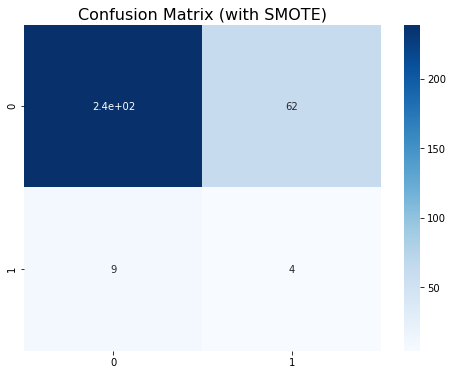

In [59]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.4f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');